# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 4. Анализ вакансий.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb` и полученные данные** (подробности далее). Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Будьте внимательны при работе со сбором данных. Ответственность за корректность ваших действий лежит на вас. Не нагружайте сервера, *делайте паузы между запросами*. Как следствие, начинайте выполнять задание заранее. **Если вас где-то забаннили и т.п., то это не является уважительной причиной продления дедлайна.**
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 2.**

---

**Баллы за задание:**

<b><a href="#Легкая-часть" style="text-decoration: none;"><font color="blue">Легкая часть</font></a></b> (достаточно на "хор"):
* Задача 1 &mdash; 60 баллов

<b><a href="#Сложная-часть" style="text-decoration: none;"><font color="orange">Сложная часть</font></a></b> (необходимо на "отл"):
* Задача 2 &mdash; 60 баллов

In [ ]:
# Bot check

# HW_ID: fpmi_ad4
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [1]:
import requests
from time import sleep
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')


Второй курс &mdash; самое время задуматься о будущей профессии и проанализировать существующие предложения. Дело тут даже не в том, чтобы найти интересную стажировку. В первую очередь сейчас стоит подумать о том, в какую сторону развиваться дальше. Например, если вы хотите работать в какой-либо конкретной профессии, то наверняка стоит развивать какие-то определенные навыки, и даже выбрать подходящую кафедру. Анализ существующих вакансий поможет определить, какие навыки вам нужны. 

Задание предполагает вариативность исследуемых данных. Вы можете выбрать один из следующих вариантов.
1. Стандартный вариант &mdash; проанализировать вакансии на сайте <a target="_blank" href="https://hh.ru/">hh.ru</a> с использованием <a target="_blank" href="https://dev.hh.ru/">официального API</a>. Далее приведен пример работы с этим API. *Если вы не достаточно уверены в своих силах, рекомендуется выбрать этот вариант.*
2. Разобраться с API других сервисов по поиску вакансий, например, <a target="_blank" href="https://career.habr.com/">Хабр.Карьера</a> или <a target="_blank" href="https://www.superjob.ru/">SuperJob</a>.
3. Извлечение данных с помощью <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/data_parsing.html#2.-Парсинг-HTML-напрямую">парсинга HTML напрямую</a> некоторых сайтов. Например, вы можете попробовать напрямую распарсить пул вакансий из тех источников, которые не предоставляют API. **Внимание! Обращайте внимание на пользовательские соглашения и на <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/data_parsing.html#Сбор-данных-из-открытых-источников">эти рекомендации</a>.**
4. Комбинирование нескольких подходов. В этом случае нужно понимать, как находить одинаковые вакансии из разных источников для избежания их двойного учета.
5. Можно также *дополнительно* брать архивные данные из недавнего прошлого, например, из <a target="_blank" href="https://boosters.pro/championship/HeadHunter/overview/description">этого соревнования</a>.

Перед выполнением задания ознакомьтесь с <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/data_parsing.html">материалом</a> о сборе данных из открытых источников.

Для получения максимального балла за задание достаточно выполнить все задание по стандартному варианту. Альтернативные варианты, даже более сложные, не дают больше баллов, чем максимальное количество баллов по стандартному варианту.

Работа в некоторой степени творческая, поэтому конкретные детали решения в основном остаются на усмотрение автора решения. Например, если в вакансии зарплата укзана "*от ...*" или  "*до ...*", то вы сами решаете, как это обрабатывать, но не забывайте про четкую аргументацию. Не забывайте также заглядывать в презентацию по выполнению и оформлению домашних заданий с занятия 2.

 ---
### Справка по работе с API сервиса hh.ru.   

<b><font color="red">Внимание!</font> При работе с API не забывайте делать паузы между запросами, чтобы не задудосить сервер. Если вас заблокируют, это не будет являться уважительной причиной переноса дедлайна.</b>

Мы будем работать только с вакансиями. Для этого не требуется регистрироваться и получать токен. Ниже приведен краткий пример работы с API. Подробное описание работы с вакансиями, включая параметры запросов и формат ответа можно почитать в <a target="_blank" href="https://github.com/hhru/api/blob/master/docs/vacancies.md#search">документации</a>.

Например, мы хотим найти вакансии по запросу `Data Scientist` в Москве. Тогда первую страницу поиска из 10 вакансий на страницу мы можем получить с запроса к API:

In [2]:
URL = 'https://api.hh.ru/vacancies'

params = {
    'text': "Data Scientist",
    'area': 1,
    'page': 0,
    'per_page': 10
}

req = requests.get(URL, params)
data = json.loads(req.content.decode())

Если все прошло успешно, полученный словарь будет иметь следующие ключи

In [3]:
data.keys()

dict_keys(['items', 'found', 'pages', 'per_page', 'page', 'clusters', 'arguments', 'alternate_url'])

Можем посмотреть на краткое описание первой вакансии

In [4]:
data['items'][0]

{'id': '77613664',
 'premium': False,
 'name': 'Data Scientist',
 'department': None,
 'has_test': False,
 'response_letter_required': False,
 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
 'salary': {'from': 150000, 'to': 200000, 'currency': 'RUR', 'gross': False},
 'type': {'id': 'open', 'name': 'Открытая'},
 'address': None,
 'response_url': None,
 'sort_point_distance': None,
 'published_at': '2023-03-02T17:13:07+0300',
 'created_at': '2023-03-02T17:13:07+0300',
 'archived': False,
 'apply_alternate_url': 'https://hh.ru/applicant/vacancy_response?vacancyId=77613664',
 'insider_interview': None,
 'url': 'https://api.hh.ru/vacancies/77613664?host=hh.ru',
 'adv_response_url': None,
 'alternate_url': 'https://hh.ru/vacancy/77613664',
 'relations': [],
 'employer': {'id': '2887273',
  'name': 'Retail Rocket',
  'url': 'https://api.hh.ru/employers/2887273',
  'alternate_url': 'https://hh.ru/employer/2887273',
  'logo_urls': {'original': 'https://hhcdn.ru/empl

Сколько всего найдено вакансий

In [5]:
data['found']

260

Количество страниц в результатах поиска

In [6]:
data['pages']

26

Из результатов можем сделать удобную таблицу, причем в дальнейшем можно оставить только те колонки, которые необходимы для анализа.

In [7]:
df = pd.json_normalize(data['items'])
df.head()

,id,premium,name,department,has_test,response_letter_required,address,response_url,sort_point_distance,published_at,...,address.metro.station_name,address.metro.line_name,address.metro.station_id,address.metro.line_id,address.metro.lat,address.metro.lng,salary,department.id,department.name,employer.logo_urls
0,77613664,False,Data Scientist,NaN,False,False,NaN,None,None,2023-03-02T17:13:07+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,74376536,False,Data scientist,NaN,False,False,NaN,None,None,2023-03-01T13:01:29+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,74257661,False,Data scientist,NaN,False,False,NaN,None,None,2023-03-01T15:02:29+0300,...,Минская,Солнцевская,133.555,133,55.723200,37.503800,NaN,NaN,NaN,NaN
3,77604691,False,Junior Data Scientist (отдел исследований и мо...,NaN,False,False,NaN,None,None,2023-03-02T14:52:44+0300,...,Белорусская,Замоскворецкая,2.19,2,55.777439,37.582107,NaN,NaN,NaN,NaN
4,77656158,False,Data Scientist Intern,NaN,False,False,NaN,None,None,2023-03-03T16:06:49+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Для получения полного описания вакансии потребуется задать отдельный запрос, используя ее `id`.

In [8]:
vacancy = df['id'].iloc[0]
vacancy_url = f'https://api.hh.ru/vacancies/{vacancy}'

req = requests.get(vacancy_url)
vacancy_info = json.loads(req.content.decode())

In [9]:
vacancy_info

{'id': '77613664',
 'premium': False,
 'billing_type': {'id': 'standard_plus', 'name': 'Стандарт плюс'},
 'relations': [],
 'name': 'Data Scientist',
 'insider_interview': None,
 'response_letter_required': False,
 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
 'salary': {'from': 150000, 'to': 200000, 'currency': 'RUR', 'gross': False},
 'type': {'id': 'open', 'name': 'Открытая'},
 'address': None,
 'allow_messages': True,
 'experience': {'id': 'between1And3', 'name': 'От 1 года до 3 лет'},
 'schedule': {'id': 'remote', 'name': 'Удаленная работа'},
 'employment': {'id': 'full', 'name': 'Полная занятость'},
 'department': None,
 'contacts': None,
 'description': '<p>Привет! Наша аналитическая команда занимается разработкой рекомендательных алгоритмов на вычислительном кластере Spark/Hadoop (50+ серверов, 2 Петабайта данных). Результаты работы нашей команды можно увидеть на сотнях сайтов электронной коммерции в России и зарубежом. Используемый технологический

### <font color="blue"><i>Легкая часть</i></font>

 ---
### Задача 1.   

Исследуем профессию Data Scientist. Найдите как можно больше вакансий по этой профессии в Москве. Учтите, что имеет смысл искать также по другим ключевым словам, например, `аналитик данных`.

In [37]:
job_names = "Data Scientist", "Аналитик данных", "Data Miner", "Data Analyst", "Data Engineer", "Big Data Analyst"

page_num = 1

In [38]:
page_is_correct = True

while page_is_correct:
    for job_name in job_names:
        params = {
            'text': job_name,
            'area': 1,
            'page': page_num,
            'per_page': 10
        }

        req = requests.get(URL, params)
        
        page_is_correct = (req.status_code == 200)
        
        if (page_is_correct == False):
            break
        
        current_data = json.loads(req.content.decode())
        current_df = pd.json_normalize(current_data['items'])
        df = pd.concat([df, current_df], ignore_index=True)
        sleep(0.5)
        
    page_num += 1
    if (page_num > 200):
        break

In [39]:
df

,id,premium,name,department,has_test,response_letter_required,address,response_url,sort_point_distance,published_at,...,address.metro.station_id,address.metro.line_id,address.metro.lat,address.metro.lng,salary,department.id,department.name,employer.logo_urls,insider_interview.id,insider_interview.url
0,77613664,False,Data Scientist,NaN,False,False,NaN,None,None,2023-03-02T17:13:07+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,74376536,False,Data scientist,NaN,False,False,NaN,None,None,2023-03-01T13:01:29+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,74257661,False,Data scientist,NaN,False,False,NaN,None,None,2023-03-01T15:02:29+0300,...,133.555,133,55.723200,37.503800,NaN,NaN,NaN,NaN,NaN,NaN
3,77604691,False,Junior Data Scientist (отдел исследований и мо...,NaN,False,False,NaN,None,None,2023-03-02T14:52:44+0300,...,2.19,2,55.777439,37.582107,NaN,NaN,NaN,NaN,NaN,NaN
4,77656158,False,Data Scientist Intern,NaN,False,False,NaN,None,None,2023-03-03T16:06:49+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12212,76539073,False,Product Analyst,NaN,False,False,NaN,None,None,2023-02-02T11:13:30+0300,...,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN
12213,76733568,False,Аналитик цифрового маркетинга,NaN,False,False,NaN,None,None,2023-02-07T17:39:56+0300,...,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN
12214,76845430,False,Руководитель направления анализа данных,NaN,False,False,NaN,None,None,2023-02-10T11:09:46+0300,...,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN
12215,76813000,False,Бизнес-аналитик,NaN,False,False,NaN,None,None,2023-02-09T13:20:58+0300,...,97.603,97,55.749100,37.539500,None,NaN,NaN,NaN,NaN,NaN


В полученную выборку некоторые вакансии могли попасть несколько раз. Удалите дубликаты.

In [40]:
df = df.drop_duplicates(subset='id', ignore_index=True)
df

,id,premium,name,department,has_test,response_letter_required,address,response_url,sort_point_distance,published_at,...,address.metro.station_id,address.metro.line_id,address.metro.lat,address.metro.lng,salary,department.id,department.name,employer.logo_urls,insider_interview.id,insider_interview.url
0,77613664,False,Data Scientist,NaN,False,False,NaN,None,None,2023-03-02T17:13:07+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,74376536,False,Data scientist,NaN,False,False,NaN,None,None,2023-03-01T13:01:29+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,74257661,False,Data scientist,NaN,False,False,NaN,None,None,2023-03-01T15:02:29+0300,...,133.555,133,55.723200,37.503800,NaN,NaN,NaN,NaN,NaN,NaN
3,77604691,False,Junior Data Scientist (отдел исследований и мо...,NaN,False,False,NaN,None,None,2023-03-02T14:52:44+0300,...,2.19,2,55.777439,37.582107,NaN,NaN,NaN,NaN,NaN,NaN
4,77656158,False,Data Scientist Intern,NaN,False,False,NaN,None,None,2023-03-03T16:06:49+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7719,77656459,False,System Analyst,NaN,False,False,NaN,None,None,2023-03-03T16:11:04+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7720,74157783,False,System analyst,NaN,False,False,NaN,None,None,2023-03-03T18:50:35+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7721,70394394,False,Системный аналитик,NaN,False,False,NaN,None,None,2023-03-03T15:16:00+0300,...,4.73,4,55.740544,37.534100,NaN,NaN,NaN,NaN,NaN,NaN
7722,77644190,False,System Analyst,NaN,False,False,NaN,None,None,2023-03-03T12:45:07+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Учитывая sleep обрабатывать 7700 запросов слишком медленно, поэтому возьмем только первую 1000.

In [53]:
df_c = df.head(1000)
df_c

,id,premium,name,department,has_test,response_letter_required,address,response_url,sort_point_distance,published_at,...,address.metro.station_id,address.metro.line_id,address.metro.lat,address.metro.lng,salary,department.id,department.name,employer.logo_urls,insider_interview.id,insider_interview.url
0,77613664,False,Data Scientist,NaN,False,False,NaN,None,None,2023-03-02T17:13:07+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,74376536,False,Data scientist,NaN,False,False,NaN,None,None,2023-03-01T13:01:29+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,74257661,False,Data scientist,NaN,False,False,NaN,None,None,2023-03-01T15:02:29+0300,...,133.555,133,55.723200,37.503800,NaN,NaN,NaN,NaN,NaN,NaN
3,77604691,False,Junior Data Scientist (отдел исследований и мо...,NaN,False,False,NaN,None,None,2023-03-02T14:52:44+0300,...,2.19,2,55.777439,37.582107,NaN,NaN,NaN,NaN,NaN,NaN
4,77656158,False,Data Scientist Intern,NaN,False,False,NaN,None,None,2023-03-03T16:06:49+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,76806337,False,Инженер-проектировщик,NaN,False,False,NaN,None,None,2023-03-02T11:38:08+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,76697979,False,DevOps/SRE инженер проекта,NaN,False,False,NaN,None,None,2023-03-03T09:33:22+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,77663500,False,Data Engineer,NaN,False,False,NaN,None,None,2023-03-03T17:34:01+0300,...,6.74,6,55.706780,37.584990,NaN,NaN,NaN,NaN,NaN,NaN
998,76552424,False,Senior Backend Developer (PHP) + Remote,NaN,False,False,NaN,None,None,2023-03-01T14:25:44+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Загрузите подробное описание каждой вакансии и создайте удобную для дальнейших действий таблицу данных.

In [54]:
detailed_df = pd.DataFrame([])

for ID in df_c['id']:
    vacancy_url = f'https://api.hh.ru/vacancies/{ID}'

    req = requests.get(vacancy_url)
    vacancy_info = json.loads(req.content.decode())
    
    vacancy_df = pd.json_normalize(vacancy_info)
    detailed_df = pd.concat([detailed_df, vacancy_df], ignore_index=True)
    
    sleep(0.5)
    

Чтобы сделать таблицу удобной, нужно убрать лишние столбцы, а для этого рассмотрим какие вообще столбцы тут есть.

In [55]:
detailed_df.keys()

Index(['id', 'premium', 'relations', 'name', 'insider_interview',
       'response_letter_required', 'address', 'allow_messages', 'department',
       'contacts', 'description', 'branded_description',
       'vacancy_constructor_template', 'key_skills', 'accept_handicapped',
       'accept_kids', 'archived', 'response_url', 'specializations',
       'professional_roles', 'code', 'hidden', 'quick_responses_allowed',
       'driver_license_types', 'accept_incomplete_resumes', 'published_at',
       'created_at', 'initial_created_at', 'negotiations_url',
       'suitable_resumes_url', 'apply_alternate_url', 'has_test', 'test',
       'alternate_url', 'working_days', 'working_time_intervals',
       'working_time_modes', 'accept_temporary', 'languages',
       'billing_type.id', 'billing_type.name', 'area.id', 'area.name',
       'area.url', 'salary.from', 'salary.to', 'salary.currency',
       'salary.gross', 'type.id', 'type.name', 'experience.id',
       'experience.name', 'schedule.id'

In [73]:
comf_df = detailed_df.copy()
comf_df = comf_df[['id', 'key_skills', 'salary.from', 'salary.to', 'salary.currency', 'schedule.name']]

In [74]:
comf_df

,id,key_skills,salary.from,salary.to,salary.currency,schedule.name
0,77613664,"[{'name': 'Python'}, {'name': 'ML'}, {'name': ...",150000.0,200000.0,RUR,Удаленная работа
1,74376536,"[{'name': 'Python'}, {'name': 'PyTorch'}, {'na...",200000.0,240000.0,RUR,Удаленная работа
2,74257661,"[{'name': 'Python'}, {'name': 'SQL'}, {'name':...",150000.0,300000.0,RUR,Полный день
3,77604691,[],NaN,NaN,NaN,Полный день
4,77656158,"[{'name': 'Revenue Management'}, {'name': 'Inf...",40000.0,50000.0,RUR,Полный день
...,...,...,...,...,...,...
995,76806337,"[{'name': 'AutoCAD'}, {'name': 'Проектирование...",115000.0,140000.0,RUR,Полный день
996,76697979,[{'name': 'Linux'}],150000.0,250000.0,RUR,Полный день
997,77663500,"[{'name': 'MS SQL'}, {'name': 'Базы данных'}, ...",NaN,NaN,NaN,Полный день
998,76552424,[],NaN,350000.0,RUR,Удаленная работа


Сделаем файл .xlsx

In [224]:
comf_df.to_excel('df_DS.xlsx')

**Полученную таблицу необходимо сохранить в формате xlsx и отправить боту вместе с решением.**

**Вопрос 1.** Сколько сейчас доступно вакансий по вашему запросу?

In [75]:
comf_df.count()

id                 1000
key_skills         1000
salary.from         248
salary.to           171
salary.currency     291
schedule.name      1000
dtype: int64

**Вопрос 2.** Какие навыки чаще всего встречаются в вакансиях по данной специальности?

Для этого найдите соответствующее поле в данных из полного описания вакансий, проанализируйте его и составьте список навыков и количество упоминаний каждого. Визуализируйте полученную информацию по топ-15 навыков.

In [96]:
skills_df = comf_df['key_skills']

res = dict()
for list_df in skills_df:
    for dict_skill in list_df:
        if dict_skill['name'] in res:
            res[dict_skill['name']] += 1
        else:
            res[dict_skill['name']] = 1

In [100]:
res = dict(sorted(res.items(), key=lambda item: item[1], reverse=True))
res

{'SQL': 266,
 'Python': 172,
 'Аналитическое мышление': 121,
 'Анализ данных': 107,
 'Linux': 89,
 'Английский язык': 86,
 'MS PowerPoint': 68,
 'BPMN': 65,
 'Работа с большим объемом информации': 62,
 'PostgreSQL': 61,
 'Бизнес-анализ': 53,
 'MS Excel': 52,
 'MS SQL': 51,
 'Power BI': 47,
 'UML': 46,
 'Аналитические исследования': 46,
 'Atlassian Jira': 43,
 'Git': 42,
 'Работа в команде': 42,
 'Системный анализ': 40,
 'Базы данных': 40,
 'Управление проектами': 40,
 'Аналитика': 36,
 'Docker': 35,
 'Data Analysis': 33,
 'Работа с базами данных': 31,
 'Hadoop': 31,
 'Big Data': 29,
 'Excel': 29,
 'Java': 28,
 'Математическая статистика': 28,
 'ETL': 28,
 'Bash': 23,
 'Tableau': 23,
 'REST': 22,
 'Грамотная речь': 22,
 'Статистический анализ': 21,
 'Kubernetes': 21,
 'Разработка технических заданий': 21,
 'Деловая коммуникация': 21,
 'Atlassian Confluence': 21,
 'Kafka': 20,
 'API': 20,
 'Spark': 19,
 'ORACLE': 19,
 'CI/CD': 19,
 'Ansible': 19,
 'Сбор и анализ информации': 19,
 'AutoCA

In [104]:
most_common_skills_df = pd.DataFrame.from_dict(res, orient = 'index')
most_common_skills_df.head(15).reset_index()

,index,0
0,SQL,266
1,Python,172
2,Аналитическое мышление,121
3,Анализ данных,107
4,Linux,89
5,Английский язык,86
6,MS PowerPoint,68
7,BPMN,65
8,Работа с большим объемом информации,62
9,PostgreSQL,61


**Вопрос 3.** Какую зарплату готовы платить работодатели? Соберите некоторым образом статистику и постройте гистограмму.

При работе с данными о заработной плате обратите внимание на валюту и <a target="_blank" href="https://yandex.ru/search/?text=gross%2Fnet&clid=1955455&win=446&lr=213&noreask=1">gross/net</a>. Постоянно подгружать курс валюты не требуется, достаточно фиксировать какой-то один более менее актуальный.

In [194]:
salary_df = comf_df[['id', 'salary.from', 'salary.to', 'salary.currency']]
not_rur = salary_df[salary_df['salary.currency'] != "RUR"]
not_rur = not_rur[not_rur['salary.currency'].notnull()]
not_rur

,id,salary.from,salary.to,salary.currency
32,76770084,5000.0,NaN,USD
44,77095137,3000.0,NaN,USD
100,76819153,5500.0,NaN,USD
169,76852251,1500.0,3000.0,EUR
245,77649189,5000.0,NaN,USD
306,77496573,4500.0,5000.0,EUR
308,76937360,1500.0,NaN,USD
383,76636823,2000.0,NaN,USD
570,76866211,2500.0,3500.0,USD
582,77601817,1200.0,1800.0,USD


In [195]:
salary_df

,id,salary.from,salary.to,salary.currency
0,77613664,150000.0,200000.0,RUR
1,74376536,200000.0,240000.0,RUR
2,74257661,150000.0,300000.0,RUR
3,77604691,NaN,NaN,NaN
4,77656158,40000.0,50000.0,RUR
...,...,...,...,...
995,76806337,115000.0,140000.0,RUR
996,76697979,150000.0,250000.0,RUR
997,77663500,NaN,NaN,NaN
998,76552424,NaN,350000.0,RUR


Так как есть только 12 вакансий с валютой отличной от рубля будем считать их выбросами

In [251]:
salary_df = salary_df.drop(not_rur.index)
salary_df

,id,salary.from,salary.to,salary.currency
0,77613664,150000.0,200000.0,RUR
1,74376536,200000.0,240000.0,RUR
2,74257661,150000.0,300000.0,RUR
3,77604691,NaN,NaN,NaN
4,77656158,40000.0,50000.0,RUR
...,...,...,...,...
995,76806337,115000.0,140000.0,RUR
996,76697979,150000.0,250000.0,RUR
997,77663500,NaN,NaN,NaN
998,76552424,NaN,350000.0,RUR


(0.0, 260000.0)

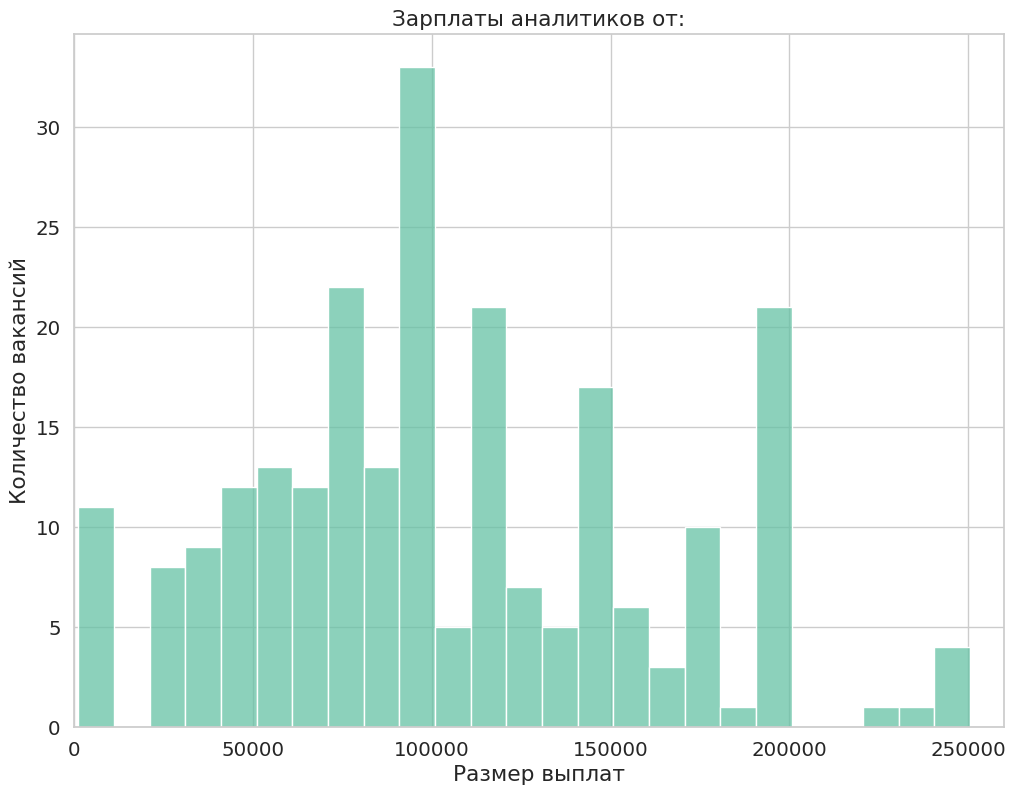

In [252]:
plt.figure(figsize=(12, 9))
sns.histplot(data=salary_df['salary.from'], bins=40, multiple="stack")
plt.xlabel("Размер выплат")
plt.ylabel("Количество вакансий")
plt.title("Зарплаты аналитиков от:")
plt.xlim((0, 260000))

(0.0, 400000.0)

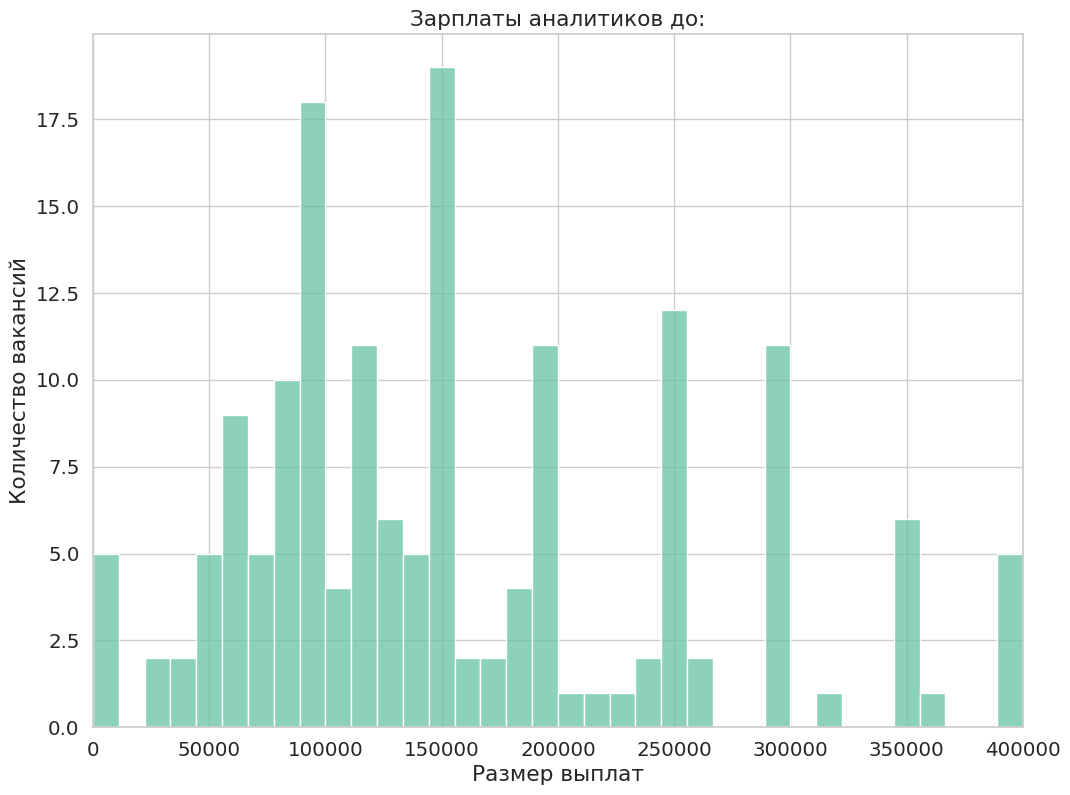

In [253]:
plt.figure(figsize=(12, 9))
sns.histplot(data=salary_df['salary.to'], bins=45, multiple="stack")
plt.xlabel("Размер выплат")
plt.ylabel("Количество вакансий")
plt.title("Зарплаты аналитиков до:")
plt.xlim((0, 400000))

Конечно есть вакансии и с большим выплатами но их мы считаем за выбросы и убираем. В среднем зарплаты начинаются от 50к-200к до 100к-400к.

Проведите аналогичный анализ для наиболее привлекательной для вас профессии в любом регионе. Если это Data Scientist, то для анализа выберите другую. В данном пункте спокойно можно сделать копипасту кода.

In [221]:
job_names = "C++ Developer", "Разработчик C++", "Программист C++"

page_num = 1

In [222]:
page_is_correct = True

new_df = pd.DataFrame([])

while page_is_correct:
    for job_name in job_names:
        params = {
            'text': job_name,
            'area': 1,
            'page': page_num,
            'per_page': 10
        }

        req = requests.get(URL, params)
        
        page_is_correct = (req.status_code == 200)
        
        if (page_is_correct == False):
            break
        
        current_data = json.loads(req.content.decode())
        current_df = pd.json_normalize(current_data['items'])
        new_df = pd.concat([new_df, current_df], ignore_index=True)
        sleep(0.2)
        
    page_num += 1
    if (new_df['id'].size > 2000):
        break

In [223]:
new_df

,id,premium,name,department,has_test,response_letter_required,address,response_url,sort_point_distance,published_at,...,address.metro.lng,address.metro_stations,address.id,address.metro,salary,employer.logo_urls,department.id,department.name,insider_interview.id,insider_interview.url
0,77609624,False,Ведущий C++ разработчик (distributed database),None,False,False,NaN,None,None,2023-03-02T16:03:42+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,71147174,False,Разработчик С++ Middle,None,False,False,NaN,None,None,2023-03-01T21:02:37+0300,...,37.504584,"[{'station_name': 'Проспект Вернадского', 'lin...",11936540,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,70734582,False,"Программист С++/Qt, junior",None,False,False,NaN,None,None,2023-03-02T12:48:38+0300,...,37.584990,"[{'station_name': 'Ленинский проспект', 'line_...",330924,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,77029829,False,Программист С++,None,False,False,NaN,None,None,2023-03-02T17:13:17+0300,...,37.558212,"[{'station_name': 'Динамо', 'line_name': 'Замо...",5764058,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,77605524,False,Программист С++,None,False,False,NaN,None,None,2023-03-02T15:03:14+0300,...,NaN,[],3172272,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005,77658719,False,Senior Unreal Engine Developer,None,False,False,NaN,None,None,2023-03-03T16:53:10+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006,72026295,False,C# программист (.NET Core Web API),None,False,False,NaN,None,None,2023-03-04T12:39:10+0300,...,37.582107,"[{'station_name': 'Белорусская', 'line_name': ...",3824149,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007,76851507,False,System ARCHITECT / smart Cameras,None,False,False,NaN,None,None,2023-03-03T12:45:21+0300,...,NaN,[],12188296,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008,77007445,False,Старший разработчик в отдел облачной инфрастру...,None,False,False,NaN,None,None,2023-03-02T11:40:48+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [225]:
new_df = new_df.drop_duplicates(subset='id', ignore_index=True)
new_df

,id,premium,name,department,has_test,response_letter_required,address,response_url,sort_point_distance,published_at,...,address.metro.lng,address.metro_stations,address.id,address.metro,salary,employer.logo_urls,department.id,department.name,insider_interview.id,insider_interview.url
0,77609624,False,Ведущий C++ разработчик (distributed database),None,False,False,NaN,None,None,2023-03-02T16:03:42+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,71147174,False,Разработчик С++ Middle,None,False,False,NaN,None,None,2023-03-01T21:02:37+0300,...,37.504584,"[{'station_name': 'Проспект Вернадского', 'lin...",11936540,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,70734582,False,"Программист С++/Qt, junior",None,False,False,NaN,None,None,2023-03-02T12:48:38+0300,...,37.584990,"[{'station_name': 'Ленинский проспект', 'line_...",330924,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,77029829,False,Программист С++,None,False,False,NaN,None,None,2023-03-02T17:13:17+0300,...,37.558212,"[{'station_name': 'Динамо', 'line_name': 'Замо...",5764058,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,77605524,False,Программист С++,None,False,False,NaN,None,None,2023-03-02T15:03:14+0300,...,NaN,[],3172272,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
753,72026295,False,C# программист (.NET Core Web API),None,False,False,NaN,None,None,2023-03-04T12:39:10+0300,...,37.582107,"[{'station_name': 'Белорусская', 'line_name': ...",3824149,NaN,NaN,NaN,NaN,NaN,NaN,NaN
754,51702201,False,Junior C developer (1310),None,False,False,NaN,None,None,2023-03-01T10:07:39+0300,...,NaN,[],180089,NaN,NaN,NaN,NaN,NaN,NaN,NaN
755,77548161,False,Python Developer,None,False,False,NaN,None,None,2023-03-01T14:46:51+0300,...,37.647800,"[{'station_name': 'Красные ворота', 'line_name...",12751648,NaN,NaN,NaN,NaN,NaN,NaN,NaN
756,77498076,False,Ведущий программист микроконтроллеров (middle),None,False,False,NaN,None,None,2023-02-28T17:26:32+0300,...,NaN,[],187903,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [228]:
new_detailed_df = pd.DataFrame([])

for ID in new_df['id']:
    vacancy_url = f'https://api.hh.ru/vacancies/{ID}'

    req = requests.get(vacancy_url)
    vacancy_info = json.loads(req.content.decode())
    
    vacancy_df = pd.json_normalize(vacancy_info)
    new_detailed_df = pd.concat([new_detailed_df, vacancy_df], ignore_index=True)
    
    sleep(0.2)
    

In [231]:
new_comf_df = new_detailed_df.copy()
new_comf_df = new_comf_df[['id', 'key_skills', 'salary.from', 'salary.to', 'salary.currency', 'schedule.name']]
new_comf_df

,id,key_skills,salary.from,salary.to,salary.currency,schedule.name
0,77609624,[{'name': 'C++'}],300000.0,600000,RUR,Полный день
1,71147174,"[{'name': 'Linux'}, {'name': 'STL'}, {'name': ...",180000.0,400000,RUR,Полный день
2,70734582,"[{'name': 'C++'}, {'name': 'ООП'}, {'name': 'Q...",80000.0,120000,RUR,Полный день
3,77029829,"[{'name': 'C/C++'}, {'name': 'C++'}, {'name': ...",200000.0,400000,RUR,Полный день
4,77605524,"[{'name': 'C++'}, {'name': 'Английский язык'},...",150000.0,None,RUR,Полный день
...,...,...,...,...,...,...
753,72026295,"[{'name': 'C#'}, {'name': 'ООП'}, {'name': '.n...",NaN,NaN,NaN,Удаленная работа
754,51702201,"[{'name': 'С'}, {'name': 'Linux'}, {'name': 'G...",NaN,NaN,NaN,Полный день
755,77548161,"[{'name': 'Python'}, {'name': 'Git'}, {'name':...",NaN,NaN,NaN,Полный день
756,77498076,[],130000.0,180000,RUR,Полный день


In [232]:
new_comf_df.to_excel('df_Cpp.xlsx')

Вопрос 1. Сколько сейчас доступно вакансий по вашему запросу?

In [234]:
new_comf_df.count()

id                 758
key_skills         758
salary.from        221
salary.to          123
salary.currency    248
schedule.name      758
dtype: int64

Вопрос 2. Какие навыки чаще всего встречаются в вакансиях по данной специальности?

In [240]:
new_skills_df = new_comf_df['key_skills']

new_res = dict()

for list_df in new_skills_df:
    for dict_skill in list_df:
        if dict_skill['name'] in new_res:
            new_res[dict_skill['name']] += 1
        else:
            new_res[dict_skill['name']] = 1

In [241]:
new_res = dict(sorted(new_res.items(), key=lambda item: item[1], reverse=True))

most_skills_df = pd.DataFrame.from_dict(new_res, orient = 'index')
most_skills_df.head(15).reset_index()

,index,0
0,C++,370
1,Linux,296
2,C/C++,232
3,Git,159
4,Python,147
5,Qt,105
6,ООП,84
7,Английский язык,71
8,STL,65
9,PostgreSQL,58


Вопрос 3. Какую зарплату готовы платить работодатели? Соберите некоторым образом статистику и постройте гистограмму.

In [277]:
new_salary_df = new_comf_df[['id', 'salary.from', 'salary.to', 'salary.currency']]
not_rur = new_salary_df[new_salary_df['salary.currency'] != "RUR"]
not_rur = not_rur[not_rur['salary.currency'].notnull()]
not_rur

,id,salary.from,salary.to,salary.currency
7,77067436,4000.0,None,USD
17,76825655,4500.0,None,USD
18,77649453,6250.0,7500,EUR
23,77553363,NaN,5700,USD
27,77425484,3000.0,7000,EUR
37,71223376,5000.0,None,USD
51,76962335,5400.0,6600,EUR
68,76852251,1500.0,3000,EUR
96,77620263,1800.0,None,USD
97,77563118,5000.0,None,USD


In [278]:
new_salary_df = new_salary_df.drop(not_rur.index)
new_salary_df

,id,salary.from,salary.to,salary.currency
0,77609624,300000.0,600000,RUR
1,71147174,180000.0,400000,RUR
2,70734582,80000.0,120000,RUR
3,77029829,200000.0,400000,RUR
4,77605524,150000.0,None,RUR
...,...,...,...,...
753,72026295,NaN,NaN,NaN
754,51702201,NaN,NaN,NaN
755,77548161,NaN,NaN,NaN
756,77498076,130000.0,180000,RUR


In [279]:
add_df = pd.DataFrame(['id', 'salary.from', 'salary.to', 'salary.currency'])

add_df = not_rur
add_df['salary.from'] = not_rur['salary.from'] * 80
add_df['salary.to'] = not_rur['salary.to'] * 80
add_df['salary.currency'] = "RUR"

In [280]:
add_df

,id,salary.from,salary.to,salary.currency
7,77067436,320000.0,NaN,RUR
17,76825655,360000.0,NaN,RUR
18,77649453,500000.0,600000,RUR
23,77553363,NaN,456000,RUR
27,77425484,240000.0,560000,RUR
37,71223376,400000.0,NaN,RUR
51,76962335,432000.0,528000,RUR
68,76852251,120000.0,240000,RUR
96,77620263,144000.0,NaN,RUR
97,77563118,400000.0,NaN,RUR


In [281]:
new_salary_df = pd.concat([new_salary_df, add_df], ignore_index=True)
new_salary_df

,id,salary.from,salary.to,salary.currency
0,77609624,300000.0,600000,RUR
1,71147174,180000.0,400000,RUR
2,70734582,80000.0,120000,RUR
3,77029829,200000.0,400000,RUR
4,77605524,150000.0,None,RUR
...,...,...,...,...
753,76936379,480000.0,NaN,RUR
754,76604456,800000.0,1200000,RUR
755,68569406,440000.0,560000,RUR
756,76867459,NaN,560000,RUR


(0.0, 300000.0)

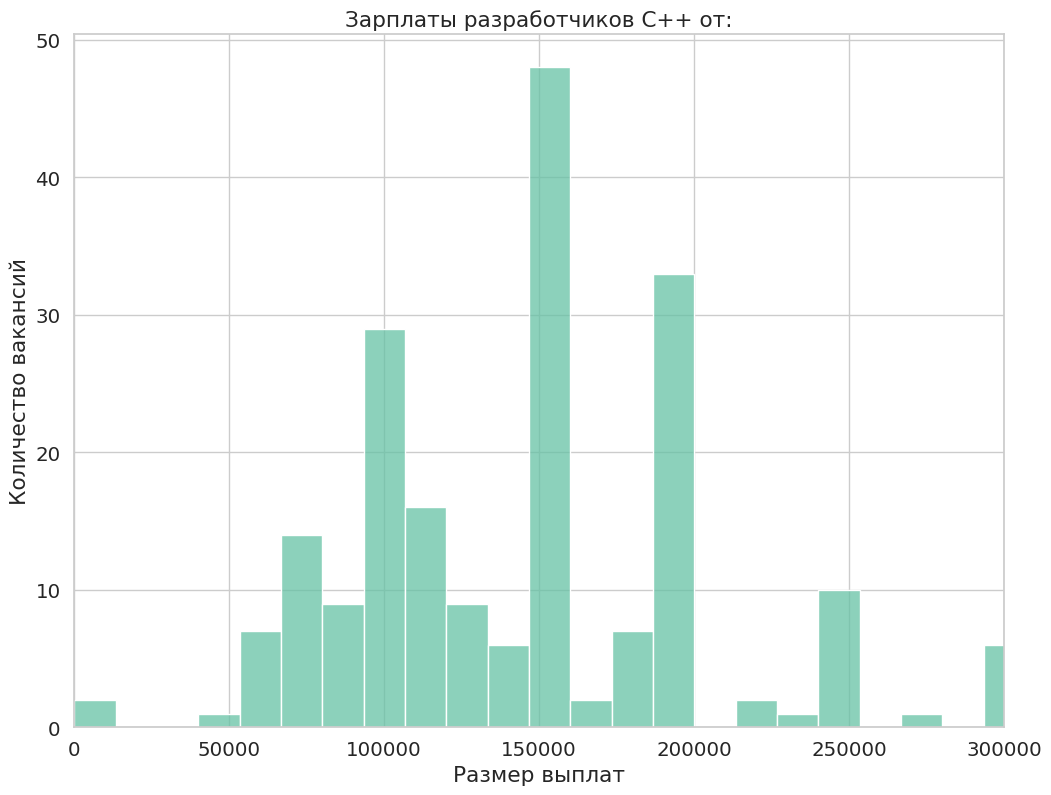

In [300]:
plt.figure(figsize=(12, 9))
sns.histplot(data=new_salary_df['salary.from'], bins=60, multiple="stack")
plt.xlabel("Размер выплат")
plt.ylabel("Количество вакансий")
plt.title("Зарплаты разработчиков C++ от:")
plt.xlim((0, 300000))

(0.0, 610000.0)

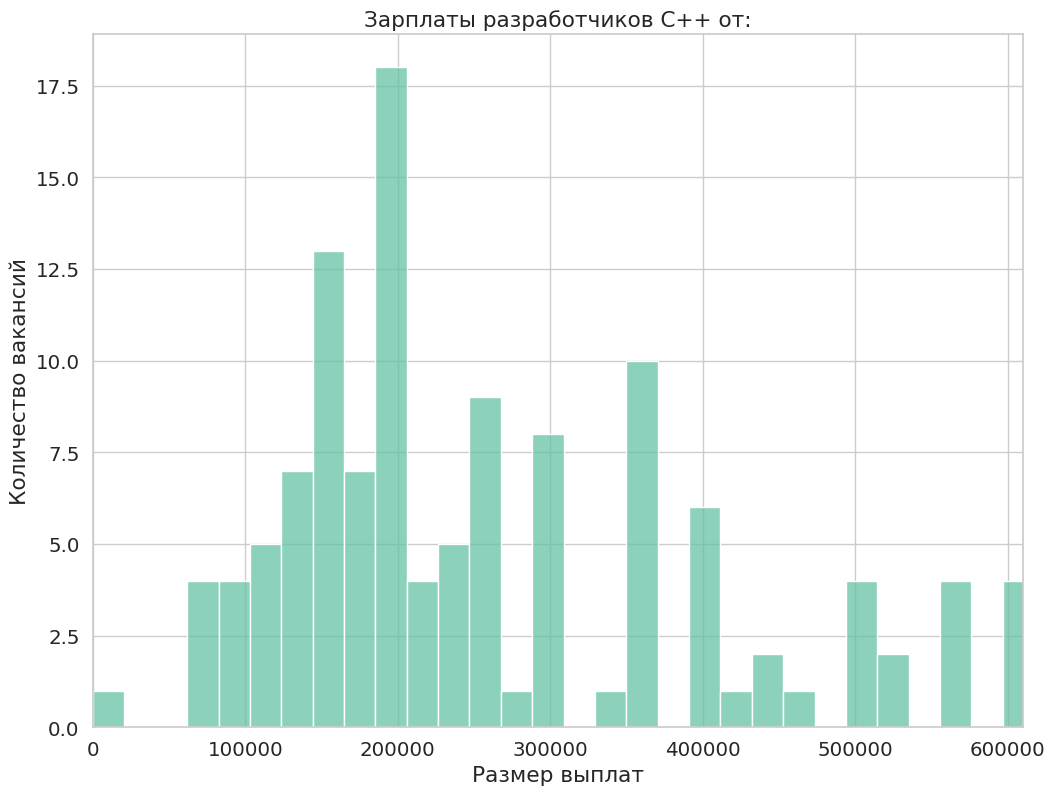

In [301]:
df_2 = new_salary_df[new_salary_df['salary.to'].notnull()]

plt.figure(figsize=(12, 9))
sns.histplot(data=df_2['salary.to'], bins=60, multiple="stack")
plt.xlabel("Размер выплат")
plt.ylabel("Количество вакансий")
plt.title("Зарплаты разработчиков C++ от:")
plt.xlim((0, 610000))

Конечно есть вакансии и с большим выплатами но их мы считаем за выбросы и убираем. В среднем зарплаты начинаются от 100к-200к до 100к-400к.

Не забывайте про выводы.

Анализ показал что наиболее востребованными умениями для Аналитиков Данных являются знание SQl, языка Phython и аналитическое мышление. В подавляющем большинстве случаев в Москве зарплаты выплачиваются в рублях. Средние зарплаты составля.т 100-150к.
У Разработчиков C++ требуют знать конечно же сам язык C++, умение пользоваться ОС Линукси и Гитом. Разработчиком C++ выплаты в иностронныз валютах продятся чаще чем Аналитикам (по крайней мере тут). Средние зарплаты в целом равны (у разработчиков C++ в целом оказались чуть выше и колебались в районе 100-200к, при этом разработчики чаще получали зарплаты 400к+).


---
### <font color="orange"><i>Сложная часть</i></font>

### Задача 2.   

Для *одной* из рассмотренных ранее профессий ответьте на следующие вопросы:  
- Какой опыт требуется для данной вакансии?
- Какие работодатели в топе? 
- В каком районе Москвы данная вакансия пользуется наибольшим и наименьшим спросом?

Не забудьте про визуализацию, в частности, постройте распределений вакансий на карте.

*Напоминание.* Работа в некоторой степени творческая, поэтому конкретные детали решения в основном остаются на усмотрение автора решения.


In [ ]:
...

Какие выводы можно сделать из построенных графиков?

<...>